# INTERSTELLA MOVIE - Characters Interactions Analytics

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.functions import extract_character_names, clean_parsed_script

## Get Data

In [3]:
df_2008 = pd.read_csv('data/2008_script_interactions.csv')
df_2014 = pd.read_csv('data/2014_script_interactions.csv')
# Find characters that appear both in the  draft and final script
with open('data/2014_script.txt', 'r') as file:
    script_2014 = file.read()
with open('data/2008_script.txt', 'r') as file:
    script_2008 = file.read()
    
names_2014 = extract_character_names(script_2014)
names_2008 = extract_character_names(script_2008)

with open('data/parsed_script_08.txt', 'r') as file:
    contents = file.readlines()
parsed_script_08 = [line.strip() for line in contents]

with open('data/parsed_script_14.txt', 'r') as file:
    contents = file.readlines()
parsed_script_14 = [line.strip() for line in contents]

## Analysis
In this analysis, we will only look at the change in role of characters who appear in both version of the script

In [5]:
shared_character = [i for i in names_2008 if i in names_2014]

# We will replece OLD MAN with PROFESSOR BRAND
shared_character.remove('OLD MAN')
shared_character.append('PROFESSOR BRAND')
print("Shared charcters:", shared_character)

# Filter interactions to include only characters in shared_character and reset index
df_2008 = df_2008[df_2008['character1'].isin(shared_character) & df_2008['character2'].isin(shared_character)].reset_index(drop=True)
df_2014 = df_2014[df_2014['character1'].isin(shared_character) & df_2014['character2'].isin(shared_character)].reset_index(drop=True)

Shared charcters: ['ADMINISTRATOR', 'BRAND', 'CASE', 'COOPER', 'DOCTOR', 'DONALD', 'DOYLE', 'MURPH', 'PRINCIPAL', 'TARS', 'TOM', 'PROFESSOR BRAND']


In [6]:
# Merge the df
df_2008 = df_2008.rename(columns={'total_interactions': 'total_interactions_08'})
df_2014 = df_2014.rename(columns={'total_interactions': 'total_interactions_14'})

merged_df = pd.merge(df_2008[['character1', 'character2', 'total_interactions_08']],
                     df_2014[['character1', 'character2', 'total_interactions_14']],
                     on=['character1', 'character2'],
                     how='right')
merged_df = merged_df.sort_values(by='character1').fillna(0).reset_index(drop=True)
merged_df[['total_interactions_08', 'total_interactions_14']] = merged_df[['total_interactions_08', 'total_interactions_14']].astype(int)
merged_df

,character1,character2,total_interactions_08,total_interactions_14
0,ADMINISTRATOR,DOCTOR,0,1
1,ADMINISTRATOR,COOPER,20,6
2,BRAND,MURPH,1,3
3,BRAND,CASE,17,26
4,BRAND,TARS,14,8
5,BRAND,COOPER,234,145
6,BRAND,DOYLE,44,20
7,BRAND,PROFESSOR BRAND,0,7
8,CASE,TARS,0,2
9,CASE,DOYLE,20,6


### An overview
Overall, interactions of main characters with side characters increase in the 2014 version.

Since Murph's role has changed significantly—she becomes the one to solve the equation and ultimately serves as the savior of humanity—Professor Brand's role shifts to that of a supportive figure in Murph's development. In the 2008 script, there are no interactions between them, but in the 2014 version, their interactions not only emerge but also become more significant, highlighting the importance of their relationship in the story. Murph has more interactions with Brand in the 2014 version, but in general, they do not interact that much.

Look at TARS and CASE; they have two interactions in the 2014 script! Remember when TARS says hello to CASE when they meet on the Endurance? AI is really doing that now.

### Cooper's Interactions

In [7]:
# Filter for Cooper's interactions
cooper_interactions = merged_df[(merged_df['character1'] == 'COOPER') | (merged_df['character2'] == 'COOPER')][['character1', 'character2', 'total_interactions_08','total_interactions_14']]

# Take out characters
cooper_interactions['Target'] = cooper_interactions.apply(lambda x: x['character2'] if x['character1'] == 'COOPER' else x['character1'], axis=1)
cooper_interactions['Source'] = 'COOPER'
cooper_interactions.drop(columns=['character1', 'character2'])
cooper_interactions = cooper_interactions[['Source', 'Target', 'total_interactions_08', 'total_interactions_14']]
cooper_interactions

,Source,Target,total_interactions_08,total_interactions_14
1,COOPER,ADMINISTRATOR,20,6
5,COOPER,BRAND,234,145
10,COOPER,CASE,68,59
11,COOPER,DOCTOR,8,10
12,COOPER,MURPH,47,107
13,COOPER,PROFESSOR BRAND,3,54
14,COOPER,TARS,46,78
15,COOPER,PRINCIPAL,17,19
16,COOPER,TOM,19,41
17,COOPER,DONALD,26,32


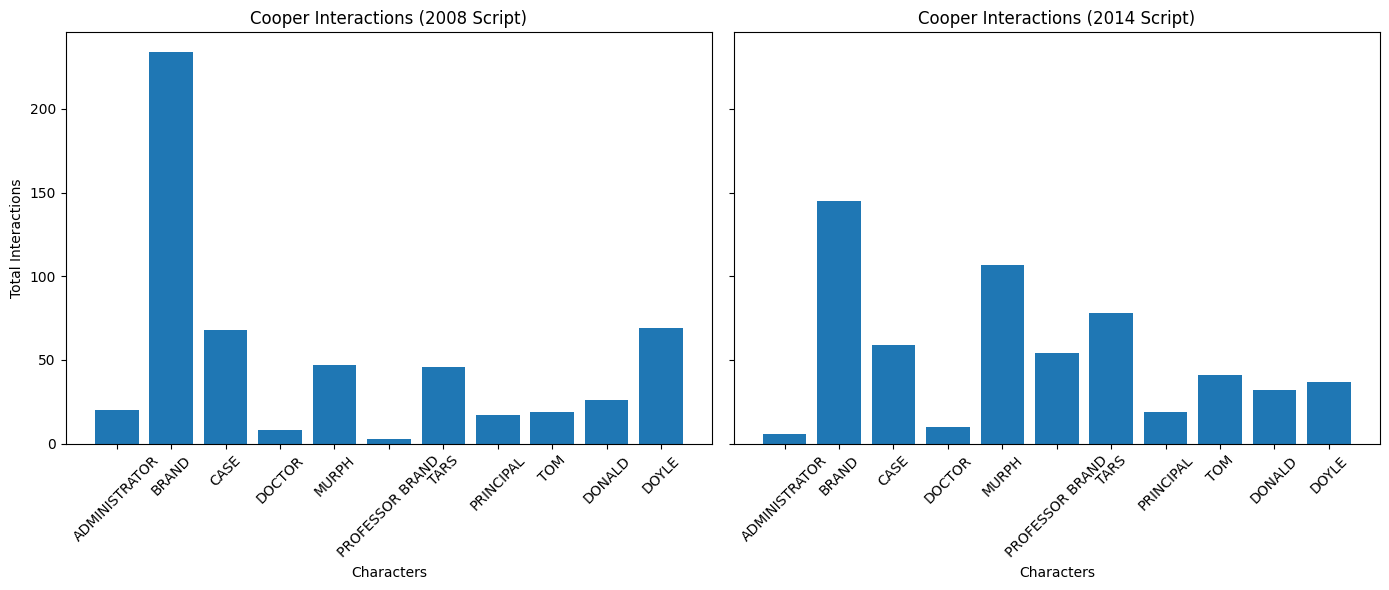

In [10]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Subplot for 2008 interactions
axes[0].bar(cooper_interactions['Target'], cooper_interactions['total_interactions_08'])
axes[0].set_title('Cooper Interactions (2008 Script)')
axes[0].set_xlabel('Characters')
axes[0].set_ylabel('Total Interactions')
axes[0].tick_params(axis='x', rotation=45)

# Subplot for 2014 interactions
axes[1].bar(cooper_interactions['Target'], cooper_interactions['total_interactions_14'])
axes[1].set_title('Cooper Interactions (2014 Script)')
axes[1].set_xlabel('Characters')
axes[1].tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### A change in plot
A quick look reveals that interactions between Murph and Cooper increase in the final 2014 version, highlighting Murph's more prominent role in the story. Meanwhile, interactions between Brand and Cooper significantly decrease, suggesting a shift in focus from a romantic subplot to a father-daughter bond. The line, 
>'In the center of the cabin, Brand and Cooper make love,'

is removed in the final 2014 script — a change, in my opinion, that feels like a strong improvement!

In general, interactions of Cooper with other characters are more balanced in the 2014 script. His interactions with family members, Tom and Donald, are higher, illustrating the theme of familial love presented in the movie. While his interactions with Doyle decrease, his interactions with Professor Brand increase, who serves as the reason for Cooper to embark on his journey throughout the film. Additionally, Cooper's interactions with the administrator decrease, as he is no longer portrayed as a hero, unlike in the original draft. The role of TARS, as we see, becomes that of a companion to Cooper during the final acts of the movie, going with him inside the Tessarac and helping him send data to Murph. TARS also meets Cooper again in Cooper Station.

### Interactions throughout the script

In [11]:
scene_14 = clean_parsed_script(parsed_script_14)
scene_14 = scene_14[scene_14['InteractionCount']>1]
scene_08 = clean_parsed_script(parsed_script_08)
scene_08 = scene_08[scene_08['InteractionCount']>1]

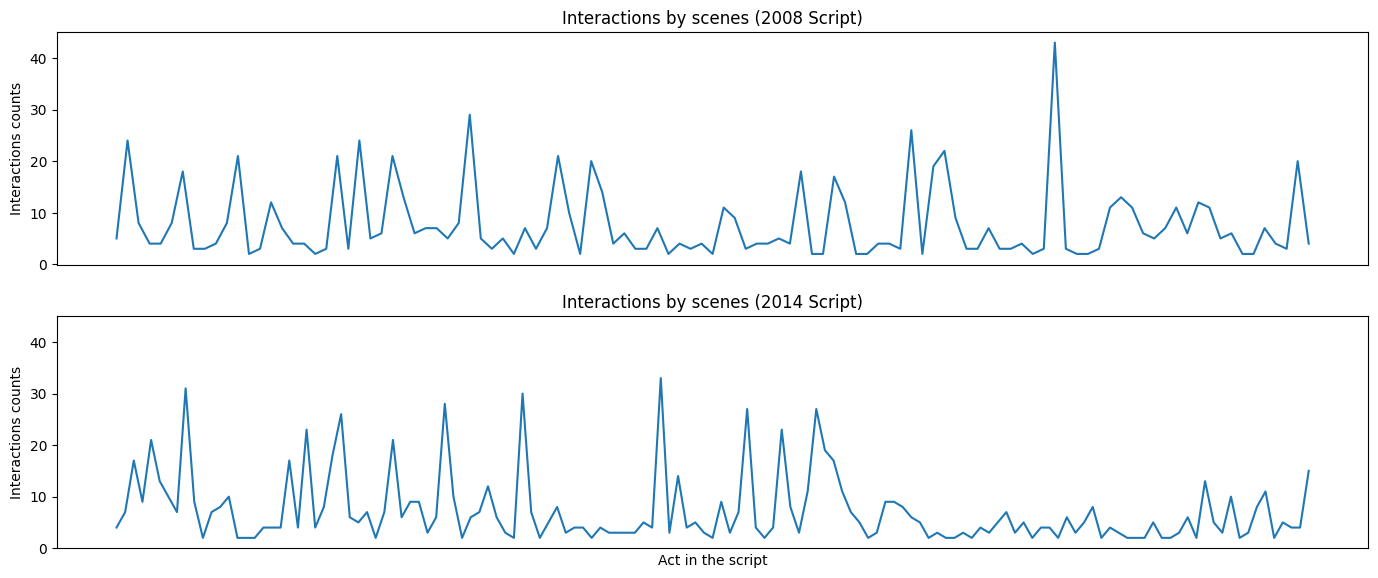

In [40]:
fig, axes = plt.subplots(2, 1, figsize=(14, 6), sharey=True)
axes[0].plot(scene_08['Scene'], scene_08['InteractionCount'])
axes[0].set_title('Interactions by scenes (2008 Script)')
axes[0].set_ylabel('Interactions counts')
axes[0].set_xticks([])

axes[1].plot(scene_14['Scene'], scene_14['InteractionCount'])
axes[1].set_title('Interactions by scenes (2014 Script)')
axes[1].set_ylabel('Interactions counts')
axes[1].set_xlabel('Act in the script')
axes[1].set_xticks([])
fig.tight_layout(pad=1.5)
plt.show()

The 2014 version of the script shows a significant change in character interactions compared to the 2008 version. Most interactions occur in the first two-thirds of the story, emphasizing the strong bond between Cooper's family members, especially in the first 30 minutes of the film.

Additionally, there are more scenes featuring character interactions in the 2014 version. This increase allows for better character development, particularly in the relationship between Murph and Cooper, making their conversations more meaningful and emotionally impactful.

The pacing of these interactions adds to the film’s overall drama, creating a sense of urgency as the story unfolds. Toward the end, there are fewer interactions in each scene, as the crew members of the Endurance face life-and-death situations. This also indicates that scenes change quickly and focus more on action than dialogue. This shift enhances the themes of survival and the impact of individual choices on humanity. Overall, the 2014 version successfully engages viewers by emphasizing character dynamics and emotional depth.